Where to write Python?

Two major options:
1. Notebooks. Despite the fact that this workshop is making extensive use of Jupyter notebooks (and they have some useful features - see lecture 3!), I would not recommend them for anything beyond the "exploration" phase of a project. Why not?
-variables are kept in memory:

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def forward_one_gen(p, s):
    return p + s * p * (1 - p)

N = 5000
s = 0.01
num_gens = 500
p_init = .25
freqs = np.zeros(num_gens)

In [13]:
freqs[0] = p_init
for i in np.arange(1,num_gens):
    freqs[i] = forward_one_gen(freqs[i-1], s)

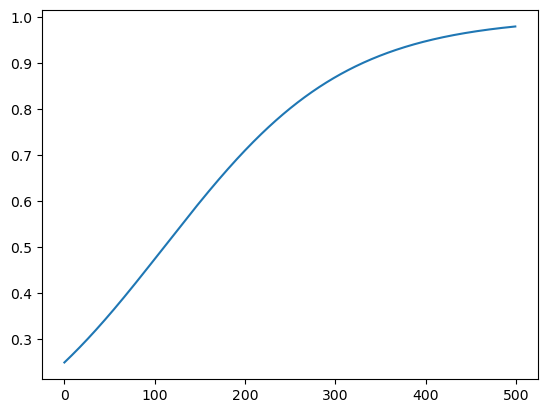

In [14]:
plt.plot(freqs)
plt.show()

uh oh!
this also highlights another problem with notebooks - how would I figure out what was wrong here? Print out the value of every variable? Seems extremely difficult if I have thousands of lines of code across multiple files...

that said, my PI (CS major in college) does 90% of his coding in notebooks so it's certainly doable.

2. some sort of actual editor.
-I use pycharm for a few reasons:
variable viewer (viewing numpy arrays well!!!) + inline plots can be useful + notebook like ability to run code after your code has completed
debugger good, we'll talk more about how to make your code run in the defensive programming lecture but sometimes print statements aren't good enough. very useful to be able to step through individual lines of code.
refactoring/renaming across a project is quite nice - I'm going to have to rename basically everything from "genic" to "additive" before I can publish my paper, I can do that. Even just finding within a project has been very useful - you copy code from one file to another, forget what the inputs to the code are exactly, just search it. (example maybe?)
plenty of alternatives exist - VSCode, emacs/vim if you actually know how to use computers, Spyder, etc.

useful things in base python (15 minutes)?
-decorators

###Advanced Introductory Python

strings! they're a tuple of characters

In [15]:
test_str = "mutable?"
print(test_str[-1])

?


In [16]:
test_str[-1] = "!"

TypeError: 'str' object does not support item assignment

they support a variety of fun methods

In [18]:
tall_test_str = test_str.upper()
print(tall_test_str)
split_str = test_str.split("u")
for split_part in split_str:
    print(split_part)

MUTABLE?
m
table?


what *should* you know about strings? how to format them!

In [24]:
freqs[0] = p_init
for i in np.arange(1,num_gens):
    freqs[i] = forward_one_gen(freqs[i-1], s)
    if not i%100:
        print(f"frequency at gen. {i} is {freqs[i]:.3f}. In a population of size {N}, {freqs[i]*N:.0f} will have the allele.")

frequency at gen. 100 is 0.475. In a population of size 5000, 2375 will have the allele.
frequency at gen. 200 is 0.711. In a population of size 5000, 3556 will have the allele.
frequency at gen. 300 is 0.870. In a population of size 5000, 4352 will have the allele.
frequency at gen. 400 is 0.948. In a population of size 5000, 4741 will have the allele.


In [ ]:
dictionaries are an ordered (as of Python 3.7, apparently!) collection of things:

In [30]:
fruit_dict = {"apples": 3, "bananas": 5, "papayas": 0}
fruit_dict["bananas"] = 4
for fruit_key, fruit_num in fruit_dict.items():
    print(f"I have {fruit_num} {fruit_key}")

shopping_list_fruits = ["apples", "pears", "papayas"]
for needed_fruit in shopping_list_fruits:
    if needed_fruit in fruit_dict and fruit_dict[needed_fruit]>0:
        print(f"got {needed_fruit}!")
    else:
        print(f"still need {needed_fruit}")

I have 3 apples
I have 4 bananas
I have 0 papayas
got apples!
still need pears
still need papayas


when would we use dictionaries?

somewhat silly case: at some point you will think to yourself, "gee I'd like to dynamically name this set of variables."
you can't. that's what a dictionary is for! you can dynamically name dictionary keys and store the corresponding value.

less silly: dictionaries are great for saving data/parameters. *show example*

In [57]:
import pickle

name = "rick"
filename = "where_am_i_saving_this.pickle"

with open(filename, "wb") as file:
    pickle.dump(name, file)
    
#he turned himself into a pickle 😱😱😱

with open(filename, "rb") as file:
    pickled_name = pickle.load(file)
print(f"I'm depickled {pickled_name}!")

I'm depickled rick!


list comprehension: even more pythonic than for loops

In [ ]:
#bad python
fruit_beginnings_range = []
for i in range(len(shopping_list_fruits)):
    fruit_i = shopping_list_fruits[i]
    fruit_beginnings_range.append(fruit_i[:2])
print(fruit_beginnings_range)

In [ ]:
#good python
fruit_beginnings_for = []
for fruit in shopping_list_fruits:
    fruit_beginnings_for.append(fruit[:2])
print(fruit_beginnings_for)

In [ ]:
#best python
fruit_beginnings_listcomp = [fruit[:2] for fruit in shopping_list_fruits]
print(fruit_beginnings_listcomp)

you might think "ok this is cute but I'm working with numbers, when would I ever use this?"
show examples from my codebase, using \[.*for.*in.*\] regex - present_mask and model classification.

control flow

not much to say here - was going to talk about match-case (new in Python 3.10!) but turns out it's much more complicated and less useful than I thought. Only addition to control flow I'll mention is the walrus operator:

In [ ]:
big_data = np.random.uniform(0,1,size=(1000,1000))
if np.sum(big_data) > 500000:
    print(np.sum(big_data))
#this computes np.sum(big_data) twice, which can get expensive!
    
#enter the walrus operator!
if (big_sum := np.sum(big_data)) > 500000:
    print(big_sum)

In [ ]:
#can MASSIVELY improve code readability - here's an example from the python standard library (copy.py) itself:
reductor = dispatch_table.get(cls)
if reductor:
    rv = reductor(x)
else:
    reductor = getattr(x, "__reduce_ex__", None)
    if reductor:
        rv = reductor(4)
    else:
        reductor = getattr(x, "__reduce__", None)
        if reductor:
            rv = reductor()
        else:
            raise Error(
                "un(deep)copyable object of type %s" % cls)
            
#becomes
if reductor := dispatch_table.get(cls):
    rv = reductor(x)
elif reductor := getattr(x, "__reduce_ex__", None):
    rv = reductor(4)
elif reductor := getattr(x, "__reduce__", None):
    rv = reductor()
else:
    raise Error("un(deep)copyable object of type %s" % cls)

also, there are some use cases for the walrus that aren't just removing an extra line of indentation:

In [ ]:
while chunk := file.read(8192):
   process(chunk)

lastly, we can use the walrus operator to improve list comprehension:

In [31]:
what_is_this = [(lambda y: [y, x/y])(x+1) for x in range(5)]
print(what_is_this)

[[1, 0.0], [2, 0.5], [3, 0.6666666666666666], [4, 0.75], [5, 0.8]]


In [32]:
#becomes
print([[y := x+1, x/y] for x in range(5)])

[[1, 0.0], [2, 0.5], [3, 0.6666666666666666], [4, 0.75], [5, 0.8]]


decorators: making functions extra functional

In [46]:
def do_twice(func):
    def do_twice_wrapper():
        func()
        func()
    return do_twice_wrapper

def cheer_bphys():
    print("woo biophysics")

In [47]:
new_func = do_twice(cheer_bphys)

woo biophysics
woo biophysics


In [43]:
new_func()

woo biophysics
woo biophysics


do the decorator!

In [48]:
@do_twice
def cheer_anything(thing):
    print(f"woo {thing}")

In [49]:
cheer_anything("chemistry")

TypeError: do_twice.<locals>.do_twice_wrapper() takes 0 positional arguments but 1 was given

In [51]:
def do_anything_twice(func):
    def do_anything_twice_wrapper(*args, **kwargs):
        func(*args, **kwargs)
        func(*args, **kwargs)
    return do_anything_twice_wrapper

@do_anything_twice
def cheer_anything(thing):
    print(f"woo {thing}")

In [52]:
cheer_anything("chemistry")

woo chemistry
woo chemistry


In [ ]:
def time_anything(func):
    def timer_wrapper(*args, **kwargs):
        #start timer
        func(*args, **kwargs)
        #stop timer
    return timer_wrapper